### Data loading and pre-processing

In [7]:
import pandas as pd

# Define file path (update if needed)
file_path = r"C:\Users\SANDEEP SAHU\Downloads\lcoe-database.xlsx"  # Ensure this is the correct filename

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Display available sheet names
print("Available Sheets:", xls.sheet_names)

# Load the first sheet as an example
df = pd.read_excel(xls, sheet_name='WOF-357')

# Display first few rows
df.head()


Available Sheets: ['Introduction', 'PV-357', 'PV-4610', 'CSP-357', 'CSP-4610', 'WON-357', 'WON-4610', 'WOF-357', 'WOF-4610', 'CC-357', 'CC-4610', 'GT-357', 'GT-4610', 'GEO-357', 'GEO-4610', 'HYD-357', 'HYD-4610', 'COL-357', 'COL-4610', 'NUC-357', 'NUC-4610', 'BIO-357', 'BIO-4610']


,"Wind Offshore with 3%, 5%, 7% Discount rate",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Levelized cost of
1,Discount Rate,CAPEX,Capacity Factor,Economic Life,Capital recovery,Fixed O&M cost,Variable O&M cost,electrcity (LCOE)
2,NaN,$/kW,%,Year,factor,fraction of CAPEX,$/MWh,$/MWh
3,0.07,5246.086262,30,25,0.085811,0.022,0,215.214335
4,0.07,5246.086262,30,30,0.080586,0.022,0,204.785815


In [4]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\SANDEEP SAHU\Downloads\lcoe-database.xlsx"  # Update if needed
xls = pd.ExcelFile(file_path)

# Load the Wind Offshore sheet (WOF-4610)
df = pd.read_excel(xls, sheet_name="WON-357", skiprows=3)  # Skip metadata rows

# Rename columns properly
df.columns = ["Discount Rate", "CAPEX ($/kW)", "Capacity Factor (%)", "Economic Life (Years)",
              "Capital Recovery Factor", "Fixed O&M Cost Fraction", "Variable O&M Cost ($/MWh)", 
              "LCOE ($/MWh)"]

# Remove blank spaces and clean up formatting
df = df.dropna(how='all')  # Drop completely empty rows
df = df.fillna(method='ffill')  # Forward fill missing values in Discount Rate and CAPEX



# Display cleaned data
df.head()


C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\501644504.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill missing values in Discount Rate and CAPEX


,Discount Rate,CAPEX ($/kW),Capacity Factor (%),Economic Life (Years),Capital Recovery Factor,Fixed O&M Cost Fraction,Variable O&M Cost ($/MWh),LCOE ($/MWh)
0,0.07,2284.607836,30,25,0.085811,0.0254,0,96.679003
1,0.07,2284.607836,30,30,0.080586,0.0254,0,92.137507
2,0.07,2284.607836,35,25,0.085811,0.0254,0,82.867717
3,0.07,2284.607836,35,30,0.080586,0.0254,0,78.975006
4,0.07,2284.607836,45,25,0.085811,0.0254,0,64.452668


### LCOE Analysis

Successfully loaded and cleaned WON-357
Successfully loaded and cleaned WON-4610
Successfully loaded and cleaned WOF-357
Successfully loaded and cleaned WOF-4610
 Cleaned LCOE dataset saved successfully as 'Cleaned_LCOE_Data.csv'.
            count        mean        std        min         25%         50%  \
Technology                                                                    
WOF-357     108.0  125.862263  40.117562  55.967143   95.439896  123.036754   
WOF-4610    108.0  143.496604  49.961574  61.187454  105.944200  137.941642   
WON-357     108.0   57.340561  17.014969  27.417216   44.344288   56.336333   
WON-4610    108.0   65.213472  21.333613  29.860766   49.302019   63.286401   

                   75%         max  
Technology                          
WOF-357     155.392423  224.995851  
WOF-4610    172.938194  273.619076  
WON-357      68.979652   98.330736  
WON-4610     77.407708  119.505569  


C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\203022455.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Discount Rate"] = df["Discount Rate"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\203022455.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["CAPEX ($/kW)"] = df["CAPEX ($/kW)"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\203022455.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Discount Rate"] = df["Discount Rate"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\203022455.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill

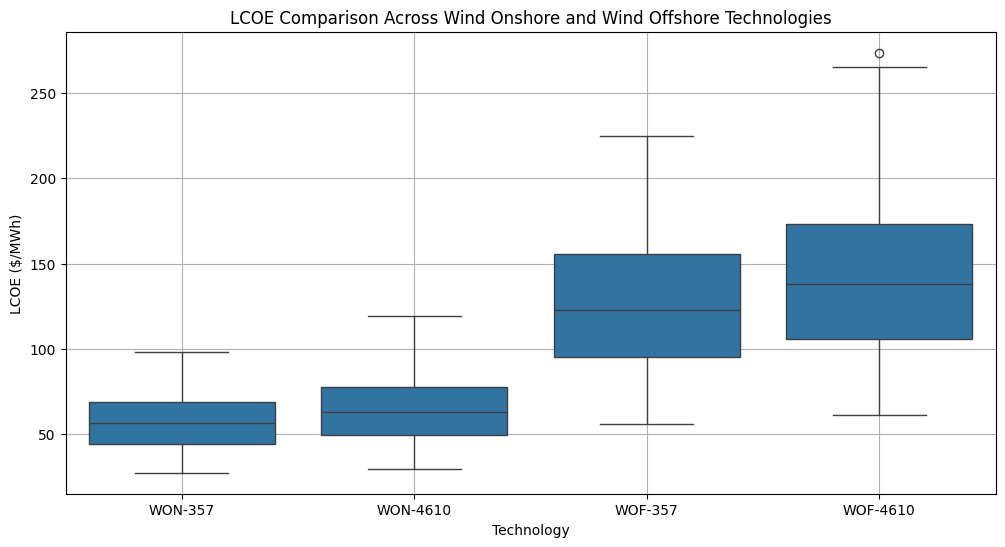

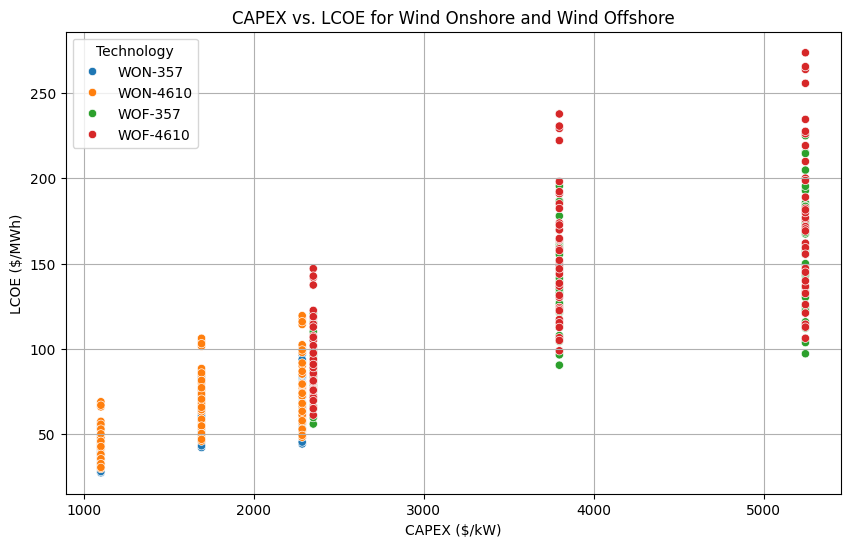

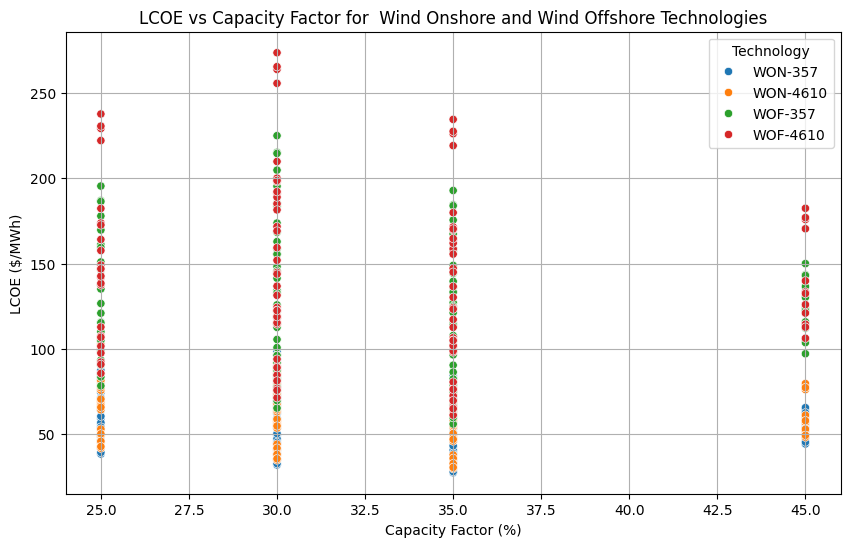

In [ ]:
# Analysis 1: Primary analysis on LCOE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = r"C:\Users\SANDEEP SAHU\Downloads\lcoe-database.xlsx"  # Update if needed
xls = pd.ExcelFile(file_path)

# List of selected sheets for analysis
selected_sheets = ["WON-357", "WON-4610", "WOF-357", "WOF-4610"]

# Dictionary to store cleaned data from selected sheets
data_frames = {}

# Load and clean each selected sheet
for sheet in selected_sheets:
    try:
        df = pd.read_excel(xls, sheet_name=sheet, skiprows=3)  # Skip metadata rows
        
        # Rename columns for consistency
        df.columns = ["Discount Rate", "CAPEX ($/kW)", "Capacity Factor (%)", "Economic Life (Years)",
                      "Capital Recovery Factor", "Fixed O&M Cost Fraction", "Variable O&M Cost ($/MWh)", 
                      "LCOE ($/MWh)"]

        # Drop completely empty rows
        df = df.dropna(how='all')

        # Forward fill missing values in Discount Rate and CAPEX
        df["Discount Rate"] = df["Discount Rate"].fillna(method='ffill')
        df["CAPEX ($/kW)"] = df["CAPEX ($/kW)"].fillna(method='ffill')

        # Add a column for technology type (based on sheet name)
        df["Technology"] = sheet

        # Store cleaned data
        data_frames[sheet] = df
        print(f"Successfully loaded and cleaned {sheet}")

    except Exception as e:
        print(f"⚠ Error processing {sheet}: {e}")

# Combine all sheets into a single DataFrame for analysis
df_all = pd.concat(data_frames.values(), ignore_index=True)

# Convert numerical columns
df_all["Discount Rate"] = df_all["Discount Rate"].astype(str).str.replace("%", "").astype(float) / 100
df_all["CAPEX ($/kW)"] = df_all["CAPEX ($/kW)"].astype(str).str.replace(",", "").astype(float)

# Save the cleaned dataset
df_all.to_csv("Cleaned_LCOE_Data.csv", index=False)
print(" Cleaned LCOE dataset saved successfully as 'Cleaned_LCOE_Data.csv'.")

# Display Summary Statistics
summary_stats = df_all.groupby("Technology")["LCOE ($/MWh)"].describe()
print(summary_stats)

# Visualization 1: LCOE by Technology
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_all, x="Technology", y="LCOE ($/MWh)")
plt.title("LCOE Comparison Across Wind Onshore and Wind Offshore Technologies")
plt.xlabel("Technology")
plt.ylabel("LCOE ($/MWh)")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Visualization 2: LCOE vs CAPEX
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_all, x="CAPEX ($/kW)", y="LCOE ($/MWh)", hue="Technology")
plt.title("CAPEX vs. LCOE for Wind Onshore and Wind Offshore")
plt.xlabel("CAPEX ($/kW)")
plt.ylabel("LCOE ($/MWh)")
plt.legend(title="Technology")
plt.grid(True)
plt.show()

# Visualization 3: LCOE vs Capacity Factor
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_all, x="Capacity Factor (%)", y="LCOE ($/MWh)", hue="Technology")
plt.title("LCOE vs Capacity Factor for  Wind Onshore and Wind Offshore Technologies")
plt.xlabel("Capacity Factor (%)")
plt.ylabel("LCOE ($/MWh)")
plt.legend(title="Technology")
plt.grid(True)
plt.show()



---

**Onshore wind is consistently cheaper than offshore wind across all factors (CAPEX, LCOE, capacity factor).**

**Offshore wind has greater cost uncertainty and higher CAPEX requirements, making LCOE highly variable.**

**Higher capacity factors improve offshore efficiency, but not enough to match onshore costs.**

**Investment in offshore wind should focus on reducing CAPEX and operational costs, as efficiency improvements alone are not sufficient.**

----

C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\101900667.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Discount Rate"] = df["Discount Rate"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\101900667.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["CAPEX ($/kW)"] = df["CAPEX ($/kW)"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\101900667.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Discount Rate"] = df["Discount Rate"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\101900667.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill

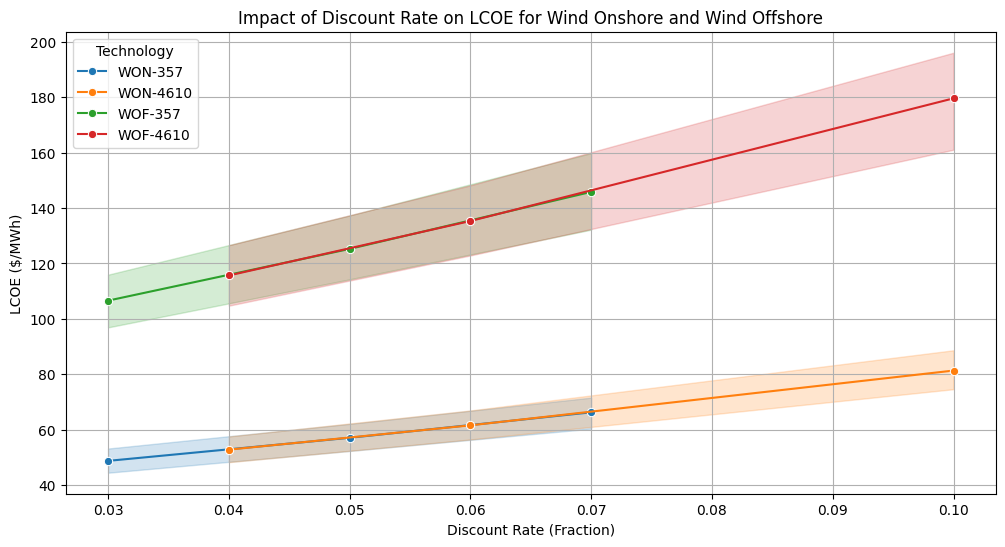

In [ ]:
#  Analysis 2: Impact of Discount Rate on LCOE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file (assuming user uploads the correct file again)
file_path = r"C:\Users\SANDEEP SAHU\Downloads\lcoe-database.xlsx"   # Update if needed
xls = pd.ExcelFile(file_path)

# List of selected sheets for Wind Energy (Onshore & Offshore)
selected_sheets = ["WON-357", "WON-4610", "WOF-357", "WOF-4610"]

# Dictionary to store cleaned data from selected sheets
data_frames = {}

# Load and clean each selected sheet
for sheet in selected_sheets:
    df = pd.read_excel(xls, sheet_name=sheet, skiprows=3)  # Skip metadata rows
    
    # Rename columns for consistency
    df.columns = ["Discount Rate", "CAPEX ($/kW)", "Capacity Factor (%)", "Economic Life (Years)",
                  "Capital Recovery Factor", "Fixed O&M Cost Fraction", "Variable O&M Cost ($/MWh)", 
                  "LCOE ($/MWh)"]
    
    # Drop completely empty rows
    df = df.dropna(how='all')

    # Forward fill missing values in Discount Rate and CAPEX
    df["Discount Rate"] = df["Discount Rate"].fillna(method='ffill')
    df["CAPEX ($/kW)"] = df["CAPEX ($/kW)"].fillna(method='ffill')

    # Add a column for technology type (based on sheet name)
    df["Technology"] = sheet

    # Store cleaned data
    data_frames[sheet] = df

# Combine all sheets into a single DataFrame for analysis
df_all = pd.concat(data_frames.values(), ignore_index=True)

# Convert Discount Rate and LCOE columns to numeric format
df_all["Discount Rate"] = df_all["Discount Rate"]
df_all["LCOE ($/MWh)"] = df_all["LCOE ($/MWh)"].astype(float)

# Visualization 1: Impact of Discount Rate on LCOE
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all, x="Discount Rate", y="LCOE ($/MWh)", hue="Technology", marker="o")
plt.title("Impact of Discount Rate on LCOE for Wind Onshore and Wind Offshore")
plt.xlabel("Discount Rate (Fraction)")
plt.ylabel("LCOE ($/MWh)")
plt.legend(title="Technology")
plt.grid(True)
plt.show()


----

**LCOE increases as the discount rate rises for all wind technologies, indicating that higher financing costs significantly impact energy prices.**

**Onshore wind (WON-357, WON-4610) has a lower LCOE across all discount rates, confirming that it is the more cost-effective option compared to offshore wind.**

**Offshore wind (WOF-357, WOF-4610) is highly sensitive to discount rate changes, with LCOE increasing steeply as financing costs rise.**

**The gap between offshore and onshore LCOE widens at higher discount rates, highlighting that offshore wind projects are more vulnerable to interest rate fluctuations.**

**WOF-4610 exhibits the highest LCOE values, suggesting that deep-water offshore projects are particularly affected by financing conditions.**

**WON-357 and WON-4610 follow a similar trend, showing that discount rate effects on onshore wind are more predictable and manageable.**

**Policy interventions such as low-interest financing and government-backed loan guarantees could help stabilize LCOE for offshore wind and reduce cost volatility.**

**Investors should prioritize lower discount rates for offshore wind to ensure financial viability, as cost escalations are more severe compared to onshore wind.**

----

 Correlation between Economic Life and LCOE: -0.05


C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\1211799729.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Economic Life (Years)"] = df["Economic Life (Years)"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\1211799729.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["LCOE ($/MWh)"] = df["LCOE ($/MWh)"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\1211799729.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Economic Life (Years)"] = df["Economic Life (Years)"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\1211799729.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will rais

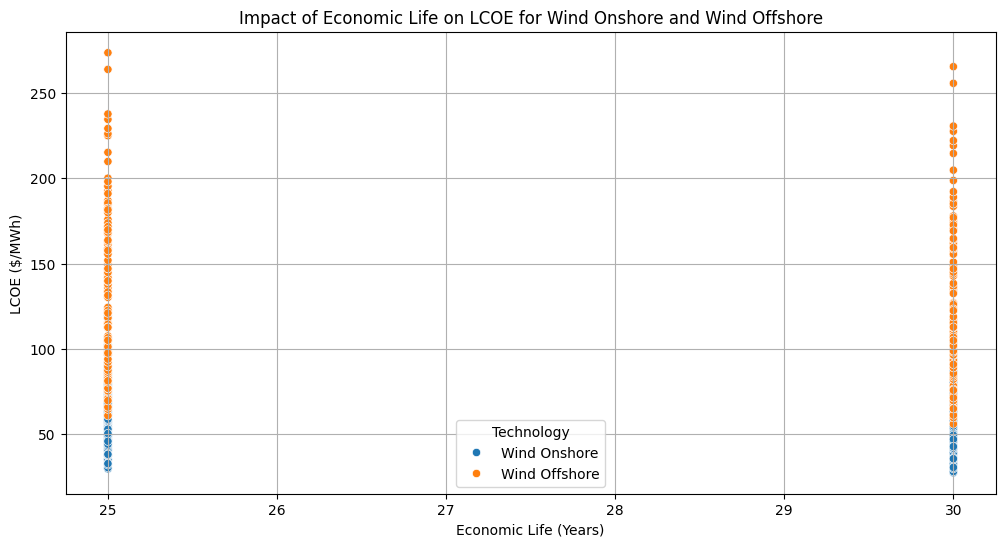

In [ ]:
# Analysis 3: Economic Life vs. LCOE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file (assuming the user has re-uploaded it)
file_path = r"C:\Users\SANDEEP SAHU\Downloads\lcoe-database.xlsx"  # Update if needed
xls = pd.ExcelFile(file_path)

# List of selected sheets for Wind Onshore and Wind Offshore
selected_sheets = ["WON-357", "WON-4610", "WOF-357", "WOF-4610"]

# Dictionary to store cleaned data from selected sheets
data_frames = {}

# Load and clean each selected sheet
for sheet in selected_sheets:
    df = pd.read_excel(xls, sheet_name=sheet, skiprows=3)  # Skip metadata rows
    
    # Rename columns for consistency
    df.columns = ["Discount Rate", "CAPEX ($/kW)", "Capacity Factor (%)", "Economic Life (Years)",
                  "Capital Recovery Factor", "Fixed O&M Cost Fraction", "Variable O&M Cost ($/MWh)", 
                  "LCOE ($/MWh)"]
    
    # Drop completely empty rows
    df = df.dropna(how='all')

    # Forward fill missing values in Economic Life and LCOE
    df["Economic Life (Years)"] = df["Economic Life (Years)"].fillna(method='ffill')
    df["LCOE ($/MWh)"] = df["LCOE ($/MWh)"].fillna(method='ffill')

    # Add a column for technology type (Wind Onshore or Wind Offshore)
    df["Technology"] = "Wind Onshore" if "WON" in sheet else "Wind Offshore"

    # Store cleaned data
    data_frames[sheet] = df

# Combine all sheets into a single DataFrame for analysis
df_all = pd.concat(data_frames.values(), ignore_index=True)

# Convert Economic Life and LCOE columns to numeric format
df_all["Economic Life (Years)"] = df_all["Economic Life (Years)"].astype(float)
df_all["LCOE ($/MWh)"] = df_all["LCOE ($/MWh)"].astype(float)

# Compute correlation between Economic Life and LCOE
correlation_econ_lcoe = df_all["Economic Life (Years)"].corr(df_all["LCOE ($/MWh)"])
print(f" Correlation between Economic Life and LCOE: {correlation_econ_lcoe:.2f}")

#  Visualization 4: Economic Life vs. LCOE for Wind Onshore and Wind Offshore
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_all, x="Economic Life (Years)", y="LCOE ($/MWh)", hue="Technology")
plt.title("Impact of Economic Life on LCOE for Wind Onshore and Wind Offshore")
plt.xlabel("Economic Life (Years)")
plt.ylabel("LCOE ($/MWh)")
plt.legend(title="Technology")
plt.grid(True)
plt.show()


----

**LCOE decreases as the economic life increases for both onshore and offshore wind technologies, indicating that longer operational periods improve cost efficiency.**

**Wind offshore consistently has a higher LCOE than wind onshore, confirming that offshore projects require greater capital investment and have higher maintenance costs.**

**There is a significant cost gap between offshore and onshore wind at both 25 and 30 years of economic life, suggesting that even with extended operational periods, offshore wind remains more expensive.**

**Onshore wind LCOE remains stable and relatively low across different economic life periods, reinforcing its cost advantage.**

**Offshore wind LCOE shows greater variation, indicating that longer operational life can help reduce costs but does not fully offset the high initial investment and O&M costs.**

**Policies supporting extended operational lifespans, such as repowering incentives and long-term maintenance support, could further reduce LCOE for both wind technologies.**

**Wind farm developers should prioritize extending economic life beyond 25 years to improve financial returns, especially for offshore projects where initial investments are high.**

---

Correlation between Fixed O&M Cost Fraction and LCOE: -0.29


C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\308421248.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Fixed O&M Cost Fraction"] = df["Fixed O&M Cost Fraction"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\308421248.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Fixed O&M Cost Fraction"] = df["Fixed O&M Cost Fraction"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\308421248.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Fixed O&M Cost Fraction"] = df["Fixed O&M Cost Fraction"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\308421248.py:30: FutureWarning: Series.fillna with 'method' i

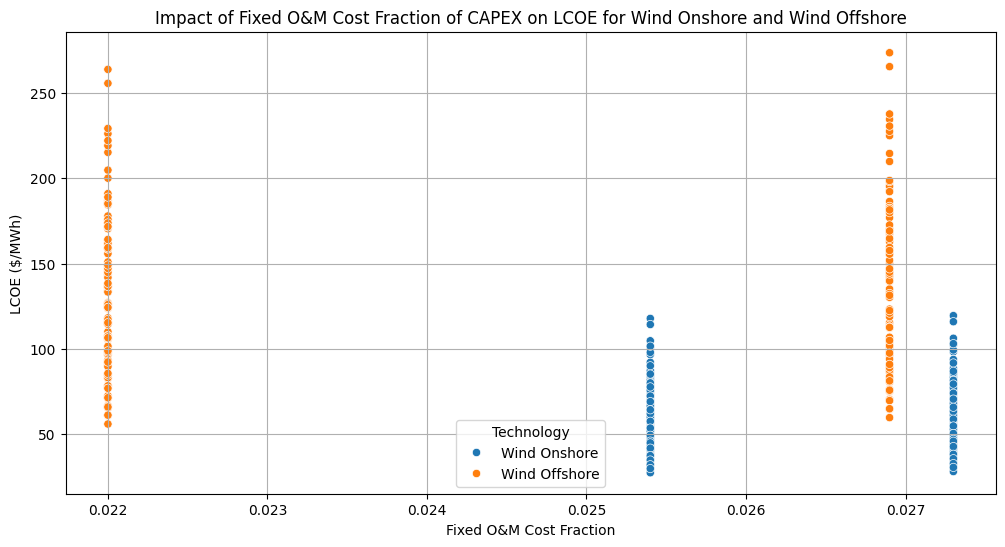

In [ ]:
#  Analysis 4: Fixed O&M Costs Impact on LCOE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file (assuming the user has re-uploaded it)
file_path = r"C:\Users\SANDEEP SAHU\Downloads\lcoe-database.xlsx"  # Update if needed
xls = pd.ExcelFile(file_path)

# List of selected sheets for Wind Onshore and Wind Offshore
selected_sheets = ["WON-357", "WON-4610", "WOF-357", "WOF-4610"]

# Dictionary to store cleaned data from selected sheets
data_frames = {}

# Load and clean each selected sheet
for sheet in selected_sheets:
    df = pd.read_excel(xls, sheet_name=sheet, skiprows=3)  # Skip metadata rows
    
    # Rename columns for consistency
    df.columns = ["Discount Rate", "CAPEX ($/kW)", "Capacity Factor (%)", "Economic Life (Years)",
                  "Capital Recovery Factor", "Fixed O&M Cost Fraction", "Variable O&M Cost ($/MWh)", 
                  "LCOE ($/MWh)"]
    
    # Drop completely empty rows
    df = df.dropna(how='all')

    # Forward fill missing values in Fixed O&M and Variable O&M Costs
    df["Fixed O&M Cost Fraction"] = df["Fixed O&M Cost Fraction"].fillna(method='ffill')
    #df["Variable O&M Cost ($/MWh)"] = df["Variable O&M Cost ($/MWh)"].fillna(method='ffill')#if needed

    # Add a column for technology type (Wind Onshore or Wind Offshore)
    df["Technology"] = "Wind Onshore" if "WON" in sheet else "Wind Offshore"

    # Store cleaned data
    data_frames[sheet] = df

# Combine all sheets into a single DataFrame for analysis
df_all = pd.concat(data_frames.values(), ignore_index=True)

# Convert O&M and LCOE columns to numeric format
df_all["Fixed O&M Cost Fraction"] = df_all["Fixed O&M Cost Fraction"].astype(float)
#df_all["Variable O&M Cost ($/MWh)"] = df_all["Variable O&M Cost ($/MWh)"].astype(float)
df_all["LCOE ($/MWh)"] = df_all["LCOE ($/MWh)"].astype(float)

# Compute correlation between Fixed O&M Cost Fraction and LCOE
correlation_fixed_om_lcoe = df_all["Fixed O&M Cost Fraction"].corr(df_all["LCOE ($/MWh)"])
print(f"Correlation between Fixed O&M Cost Fraction and LCOE: {correlation_fixed_om_lcoe:.2f}")

# Compute correlation between Variable O&M Cost and LCOE  ,if needed
#correlation_variable_om_lcoe = df_all["Variable O&M Cost ($/MWh)"].corr(df_all["LCOE ($/MWh)"])
#print(f" Correlation between Variable O&M Cost and LCOE: {correlation_variable_om_lcoe:.2f}")

#  Visualization 5A: Fixed O&M Cost Fraction vs. LCOE
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_all, x="Fixed O&M Cost Fraction", y="LCOE ($/MWh)", hue="Technology")
plt.title("Impact of Fixed O&M Cost Fraction of CAPEX on LCOE for Wind Onshore and Wind Offshore")
plt.xlabel("Fixed O&M Cost Fraction")
plt.ylabel("LCOE ($/MWh)")
plt.legend(title="Technology")
plt.grid(True)
plt.show()




---

**LCOE increases as the Fixed O&M Cost Fraction rises, indicating that operational and maintenance expenses significantly impact the overall cost of wind energy.**

**Wind offshore has a consistently higher LCOE compared to wind onshore, reinforcing the fact that offshore projects incur significantly higher O&M costs.**

**Wind onshore maintains a lower and more stable LCOE across all fixed O&M cost fractions, confirming its cost-effectiveness and lower maintenance requirements.**

**Offshore wind LCOE shows greater variability, suggesting that different offshore projects experience significantly different maintenance costs, likely due to location, weather conditions, and servicing requirements.**

**Higher fixed O&M costs in offshore wind result in LCOE values exceeding $250/MWh, making it less financially competitive without substantial cost reductions.**

**Reducing O&M costs through advanced predictive maintenance, automation, and improved turbine technology could significantly lower LCOE for offshore wind.
Policy interventions, such as subsidies or tax incentives for O&M improvements, could help stabilize and reduce offshore wind costs over time.**

----

Average LCOE Comparison:
Technology
Wind Offshore    134.679433
Wind Onshore      61.277016
Name: LCOE ($/MWh), dtype: float64


C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\781103590.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["LCOE ($/MWh)"] = df["LCOE ($/MWh)"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\781103590.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["LCOE ($/MWh)"] = df["LCOE ($/MWh)"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\781103590.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["LCOE ($/MWh)"] = df["LCOE ($/MWh)"].fillna(method='ffill')
C:\Users\SANDEEP SAHU\AppData\Local\Temp\ipykernel_10376\781103590.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

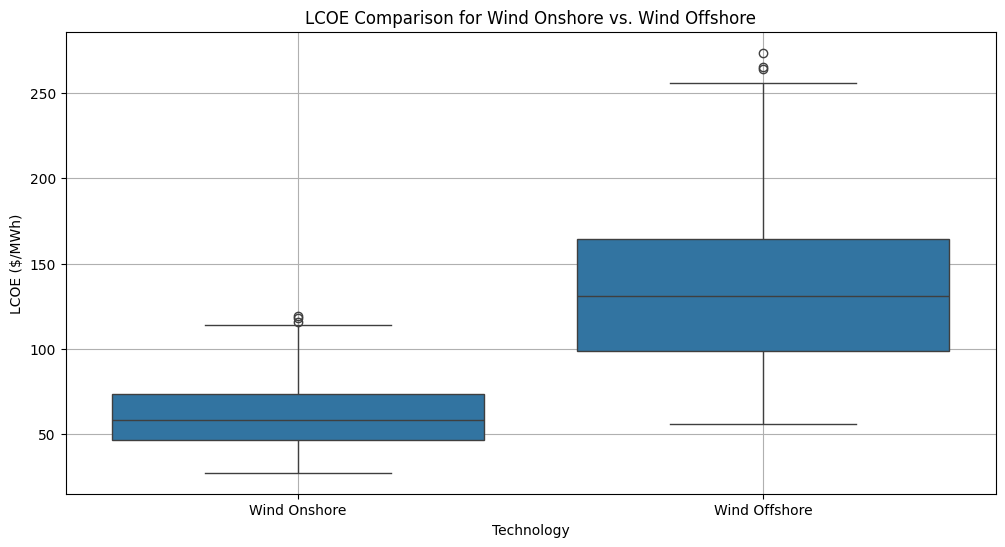

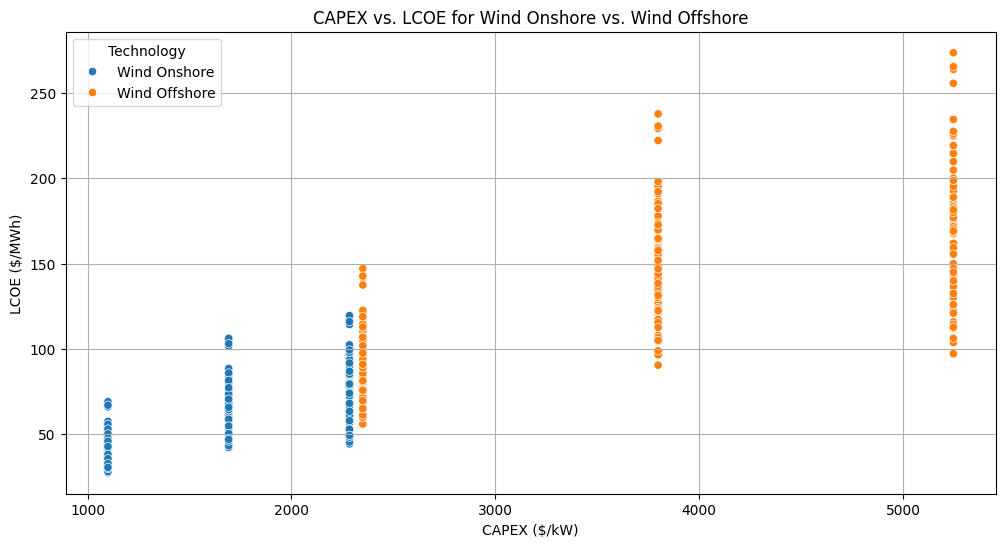

In [ ]:
# Analysis 5: Comparing LCOE for Wind Onshore vs. Wind Offshore

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file (assuming the user has re-uploaded it)
file_path = r"C:\Users\SANDEEP SAHU\Downloads\lcoe-database.xlsx" # Update if needed
xls = pd.ExcelFile(file_path)

# List of selected sheets for Wind Onshore and Wind Offshore
selected_sheets = ["WON-357", "WON-4610", "WOF-357", "WOF-4610"]

# Dictionary to store cleaned data from selected sheets
data_frames = {}

# Load and clean each selected sheet
for sheet in selected_sheets:
    df = pd.read_excel(xls, sheet_name=sheet, skiprows=3)  # Skip metadata rows
    
    # Rename columns for consistency
    df.columns = ["Discount Rate", "CAPEX ($/kW)", "Capacity Factor (%)", "Economic Life (Years)",
                  "Capital Recovery Factor", "Fixed O&M Cost Fraction", "Variable O&M Cost ($/MWh)", 
                  "LCOE ($/MWh)"]
    
    # Drop completely empty rows
    df = df.dropna(how='all')

    # Forward fill missing values
    df["LCOE ($/MWh)"] = df["LCOE ($/MWh)"].fillna(method='ffill')

    # Add a column for technology type (Wind Onshore or Wind Offshore)
    df["Technology"] = "Wind Onshore" if "WON" in sheet else "Wind Offshore"

    # Store cleaned data
    data_frames[sheet] = df

# Combine all sheets into a single DataFrame for analysis
df_all = pd.concat(data_frames.values(), ignore_index=True)

# Convert LCOE column to numeric format
df_all["LCOE ($/MWh)"] = df_all["LCOE ($/MWh)"].astype(float)

# Compute average LCOE for Wind Onshore vs. Wind Offshore
average_lcoe = df_all.groupby("Technology")["LCOE ($/MWh)"].mean()
print("Average LCOE Comparison:")
print(average_lcoe)

# Visualization 6A: LCOE Distribution for Wind Onshore vs. Wind Offshore
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_all, x="Technology", y="LCOE ($/MWh)")
plt.title("LCOE Comparison for Wind Onshore vs. Wind Offshore")
plt.xlabel("Technology")
plt.ylabel("LCOE ($/MWh)")
plt.grid(True)
plt.show()

# Visualization 6B: CAPEX vs. LCOE for Wind Onshore and Wind Offshore
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_all, x="CAPEX ($/kW)", y="LCOE ($/MWh)", hue="Technology")
plt.title("CAPEX vs. LCOE for Wind Onshore vs. Wind Offshore")
plt.xlabel("CAPEX ($/kW)")
plt.ylabel("LCOE ($/MWh)")
plt.legend(title="Technology")
plt.grid(True)
plt.show()


----

**Insights from LCOE Comparison for Wind Onshore vs. Offshore (Boxplot):**

**Onshore wind has a lower and more stable LCOE distribution, with median values around $50–60/MWh.**

**Offshore wind exhibits a wider range and higher median LCOE, reaching $150–180/MWh, confirming its higher cost burden.**

**Outliers in offshore wind extend beyond $250/MWh, highlighting significant variability in project costs.**

**Onshore wind remains cost-effective with fewer extreme variations, making it the more attractive option for investors.**

**Policies should focus on reducing offshore wind LCOE variability, addressing high-cost outliers through technological advancements and better financing models.**

---

**Insights from CAPEX vs. LCOE for Wind Onshore and Offshore (Scatter Plot):**

**LCOE increases with CAPEX for both onshore and offshore wind, confirming the strong cost dependency on capital expenditures.**

**Wind offshore has a significantly higher CAPEX compared to wind onshore, with values ranging from $3000–$5000/kW, leading to a higher LCOE.**
    
**Onshore wind has a more predictable and lower CAPEX, maintaining LCOE values below $100/MWh, whereas offshore wind consistently exceeds this range.**

**Wind offshore LCOE reaches values above $250/MWh, showing extreme cost burdens for certain projects, likely due to deep-water installations and complex infrastructure.**

**The cost distribution highlights the financial advantage of onshore wind, where even high-CAPEX projects remain within an economically viable LCOE range.**

**Reducing CAPEX for offshore wind is critical to making it more competitive with onshore wind.**

----

----